<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [18]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess


# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Training and Evaluation data For movie reviews.csv')

# Preprocess the text data
def preprocess_text(text):
    return simple_preprocess(text, deacc=True)  # Tokenize text and remove punctuation

# Apply text preprocessing
processed_data = data['clean_review'].apply(preprocess_text)

# Creating a dictionary mapping words to their integer ids
dictionary = Dictionary(processed_data)

# Creating a bag-of-words representation for each document in the corpus
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

# Printing the features  used for text representation
print("Features  used for text representation:")
for word_id, word in dictionary.items():
    print(f"Feature #{word_id}: {word}")

# Number of topics
num_topics = 10

# Number of passes over the corpus during training
passes = 10

# Create the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Get the top words for each topic
top_words = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

# Generate descriptions for each topic
topic_descriptions = []
for topic_id, words in top_words:
    description = ", ".join([word[0] for word in words])
    topic_descriptions.append(description)

# Print the top words and descriptions for each topic
print("\nTop 10 clusters for topic modeling:")
for idx, (words, description) in enumerate(zip(top_words, topic_descriptions)):
    print(f"Cluster #{idx + 1}: {description}")

# Print the automatically generated descriptions for each topic
print("\nSummarized description for individual topic:")
for idx, description in enumerate(topic_descriptions):
    print(f"Cluster #{idx + 1}: {description}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Features  used for text representation:
Feature #0: absolut
Feature #1: act
Feature #2: ad
Feature #3: also
Feature #4: anchor
Feature #5: anxiou
Feature #6: apart
Feature #7: atom
Feature #8: attack
Feature #9: audienc
Feature #10: away
Feature #11: beauti
Feature #12: best
Feature #13: bibl
Feature #14: blunt
Feature #15: bomb
Feature #16: brain
Feature #17: brilliant
Feature #18: call
Feature #19: career
Feature #20: cast
Feature #21: chase
Feature #22: cillian
Feature #23: cinematographi
Feature #24: clue
Feature #25: colour
Feature #26: consistenli
Feature #27: continu
Feature #28: could
Feature #29: decad
Feature #30: den
Feature #31: dialogu
Feature #32: differ
Feature #33: easili
Feature #34: emili
Feature #35: especi
Feature #36: express
Feature #37: fact
Feature #38: fantast
Feature #39: film
Feature #40: filmmak
Feature #41: finest
Feature #42: fir

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

Selected Features:
['act' 'actor' 'also' 'atom' 'audienc' 'beauti' 'best' 'biopic' 'blunt'
 'bomb' 'build' 'cast' 'charact' 'christoph' 'cillian' 'cinema' 'could'
 'damon' 'day' 'dont' 'downey' 'emili' 'end' 'even' 'event' 'ever'
 'experi' 'film' 'first' 'florenc' 'get' 'give' 'go' 'good' 'great'
 'histori' 'hour' 'imax' 'import' 'jr' 'know' 'life' 'like' 'long' 'look'
 'love' 'make' 'man' 'mani' 'moment' 'movi' 'much' 'murphi' 'need' 'never'
 'nolan' 'nuclear' 'one' 'oppenheim' 'oscar' 'peopl' 'perform' 'person'
 'play' 'polit' 'power' 'pugh' 'remind' 'robert' 'role' 'say' 'scene'
 'scientist' 'score' 'second' 'see' 'seen' 'show' 'someth' 'sound' 'still'
 'stori' 'strauss' 'studi' 'take' 'think' 'time' 'true' 'use' 'viewer'
 'war' 'watch' 'way' 'weapon' 'well' 'winner' 'work' 'world' 'would'
 'year']
Average Performance Metrics (10-fold cross-validation):
Logistic Regression:
Accuracy: 0.999
Precision: 0.9990131578947368
Recall: 0.999
F1 Score: 0.9989931071766455

Random Forest:
Accur

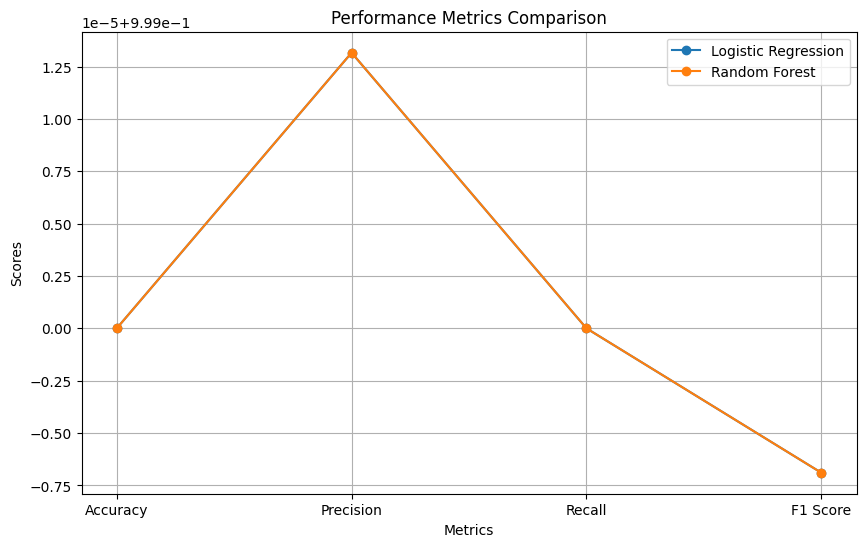

In [3]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Training and Evaluation data For movie reviews.csv')

# Select features
X = data['clean_review']
y = data['Sentiment']

# Feature extraction using TF-IDF vectorizer with top 100 features
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Get the selected features
selected_features = tfidf_vectorizer.get_feature_names_out()

# Print the selected features
print("Selected Features:")
print(selected_features)

# Define a function for cross-validation
def cross_validate(model, X, y, cv=10):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)

        accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
        precision_scores.append(precision_score(y_test_fold, y_pred_fold, average='weighted'))
        recall_scores.append(recall_score(y_test_fold, y_pred_fold, average='weighted'))
        f1_scores.append(f1_score(y_test_fold, y_pred_fold, average='weighted'))

    avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    return avg_accuracy, avg_precision, avg_recall, avg_f1

# Model 1: Logistic Regression
lr_model = LogisticRegression()
lr_avg_accuracy, lr_avg_precision, lr_avg_recall, lr_avg_f1 = cross_validate(lr_model, X_tfidf, y)

# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_avg_accuracy, rf_avg_precision, rf_avg_recall, rf_avg_f1 = cross_validate(rf_model, X_tfidf, y)

# Print the average performance metrics
print("Average Performance Metrics (10-fold cross-validation):")
print("Logistic Regression:")
print(f"Accuracy: {lr_avg_accuracy}")
print(f"Precision: {lr_avg_precision}")
print(f"Recall: {lr_avg_recall}")
print(f"F1 Score: {lr_avg_f1}")
print("\nRandom Forest:")
print(f"Accuracy: {rf_avg_accuracy}")
print(f"Precision: {rf_avg_precision}")
print(f"Recall: {rf_avg_recall}")
print(f"F1 Score: {rf_avg_f1}")

import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lr_scores = [lr_avg_accuracy, lr_avg_precision, lr_avg_recall, lr_avg_f1]
rf_scores = [rf_avg_accuracy, rf_avg_precision, rf_avg_recall, rf_avg_f1]

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(metrics, lr_scores, marker='o', label='Logistic Regression')
plt.plot(metrics, rf_scores, marker='o', label='Random Forest')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.grid(True)
plt.show()

**Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation**

TF-IDF was used to extract features from movie reviews. They represent commonly used words and phrases that are indicative of sentiments expressed in such reviews. These characteristics include sentiment indicators like 'good', 'great', 'beautiful', 'best', 'love', 'enjoy', and 'winner', as well as phrases connected to important subjects in movies such as 'biopic', 'history', 'war','scientist', 'weapon', and 'politics'. There are also industry-specific terms such as 'director', 'actor', 'Oscar', 'award', and 'cinema', as well as frequent adjectives and adverbs. These elements serve to capture the emotion of movie reviews and are useful for sentiment analysis.




# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

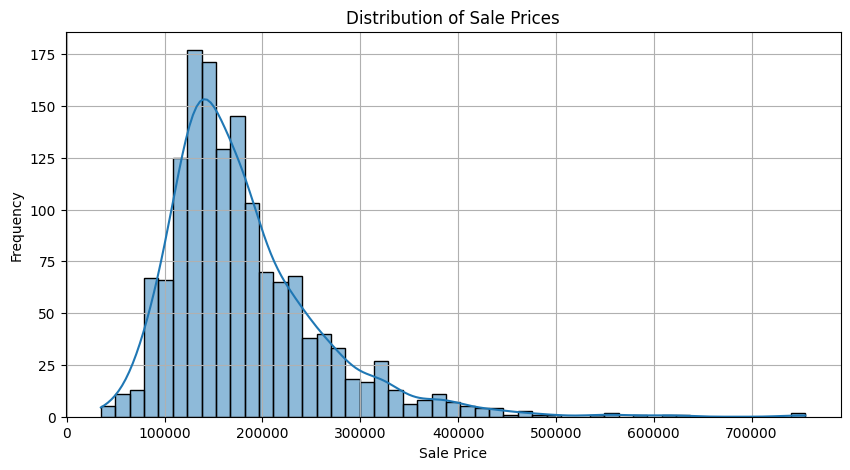

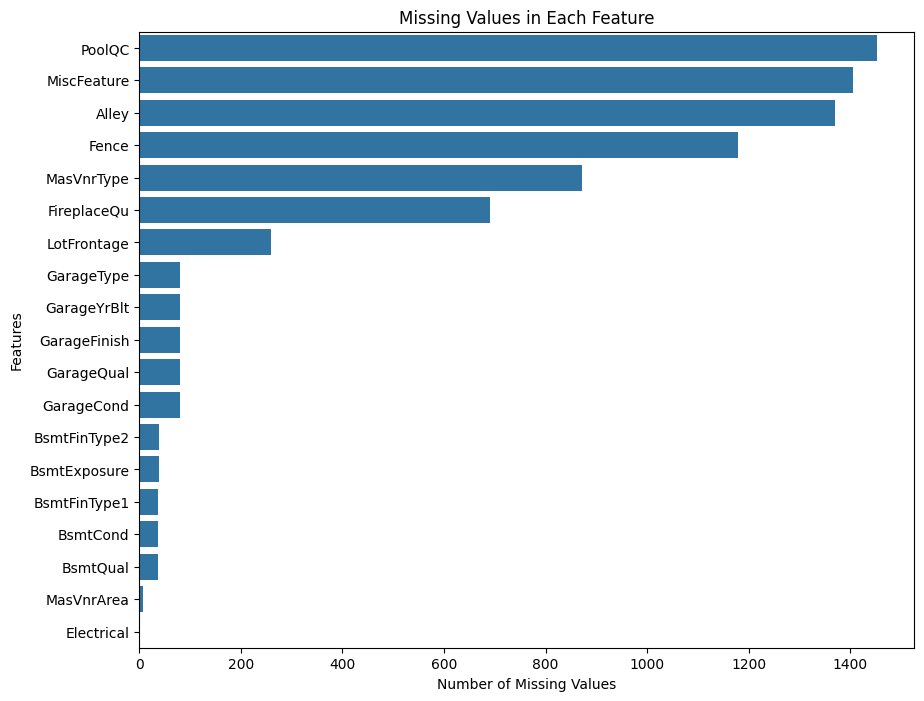

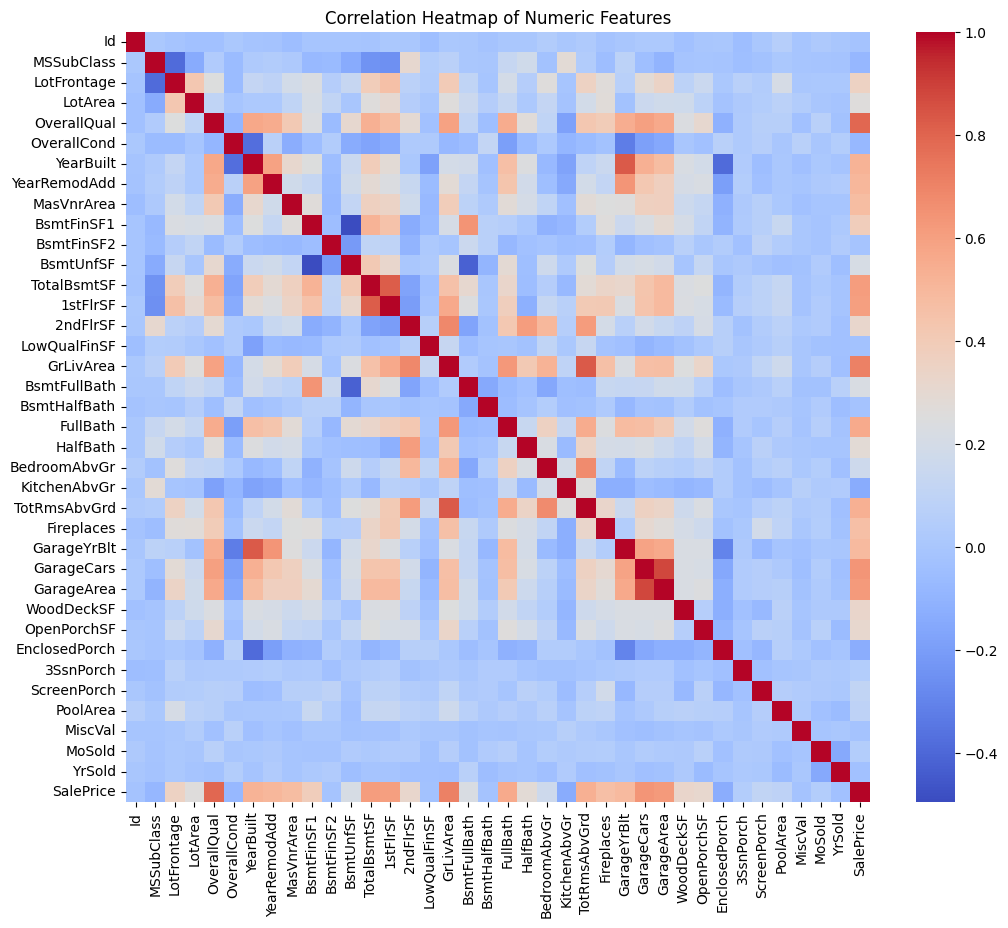

Evaluation metrics
Root Mean Squared Error: 39474.54338116011
R² Score: 0.7968483304281094
PEDECTIONS FOR TEST SET
        Id  Predicted Sale Price
0     1461         109268.874946
1     1462         153209.316626
2     1463         155350.621393
3     1464         171260.257571
4     1465         219087.470343
...    ...                   ...
1454  2915          71876.172869
1455  2916          88121.561522
1456  2917         144546.765916
1457  2918          93506.357815
1458  2919         222568.497134

[1459 rows x 2 columns]


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the training and test datasets
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

# EDA: Analyzing the distribution of the SalePrice
plt.figure(figsize=(10, 5))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Check for missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title('Missing Values in Each Feature')
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')
plt.show()


# Select only numeric columns for correlation matrix
numeric_data = train_data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Feature Selection based on correlation
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                     'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                     'YearBuilt', 'YearRemodAdd']

#These are the  features i have chosen because they have a strong linear correlation with the target variable
#The selected features are important indications of a property's worth and characteristics.

# Handling missing values in test data by imputing with median from train data
for feature in ['GarageCars', 'GarageArea', 'TotalBsmtSF']:
    median_value = train_data[feature].median()
    test_data[feature].fillna(median_value, inplace=True)

# Splitting data into train and test sets for training data
X = train_data[selected_features]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test set
y_pred = model.predict(X_test)

# Evaluating the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Evaluation metrics")
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

# Making predictions with the model on the external test data
test_features = test_data[selected_features]
predicted_prices = model.predict(test_features)

# Creating a DataFrame to display IDs and their predicted Sale Prices
predictions_df = pd.DataFrame({
    'Id': test_data['Id'],
    'Predicted Sale Price': test_predictions
})
print("PEDECTIONS FOR TEST SET")
print(predictions_df)



# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


**1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources, number of parameters, and any task-specific fine-tuning if applied.**

I have used "bert-based-uncased" as the model. BERT (bert-base-uncased) was pre-trained using BooksCorpus and English Wikipedia. These datasets contain a wide range of text from different domains. The bert-base-uncased variation includes around 110 million parameters, which enables it to capture complicated language patterns and semantics.
BERT can be fine-tuned on labeled sentiment analysis datasets, but it can also do sentiment analysis in a zero-shot mode without task-specific fine-tuning. In this case, the model uses its pre-trained information to accurately anticipate sentiment analysis tasks.

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import pipeline

# Initialize the sentiment analysis
nlp = pipeline("sentiment-analysis", model="bert-base-uncased")

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Training and Evaluation data For movie reviews.csv')

# Extract text and ground truth sentiment labels
texts = df['clean_review'].tolist()
true_labels = df['Sentiment'].tolist()

# Truncate or pad the input sequences to a maximum length of 512 tokens
# BERT Based only supports 512 tokens of max length
max_length = 512
texts = [text[:max_length] for text in texts]

# Perform sentiment analysis using BERT
predictions = nlp(texts)

# Convert predicted sentiment into binary labels
predicted_labels = ['Positive' if pred['label'] == 'POSITIVE' else 'Negative' for pred in predictions]

# Encode labels into numerical format
label_map = {'Positive': 1, 'Negative': 0}
true_labels = [label_map[label] for label in true_labels]
predicted_labels = [label_map[label] for label in predicted_labels]

# Calculating evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.20
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**(5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.**

Advantages:

BERT Pre-trained representations capture a lot of semantic information. The BERT Fine-tuning flexibility allows for adaption to individual activities. It Transfer learning enables the successful application of pre-trained knowledge.The Contextual comprehension of BERT boosts sentiment analysis accuracy.

Disadvantages:

It has High processing demand and memory footprint. It has too much Difficulty deploying to resource-constrained situations. There are so many Difficulties in adjusting to domain-specific subtleties.


Challenges faced:

The RAM has been crashed too many time by running this program. The BERT uses more RAM while running. Choosing the best fine-tuning method, which includes learning rates, batch sizes, and the number of training epochs, may be difficult.

Using the fine tuning can help increase the accuracy